In [22]:
import pandas as pd
import os
import json
import requests
import datetime
import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [23]:
load_dotenv()

True

In [24]:
api_key = os.getenv("Coin_market_cap_api")

latest_listings_url = f"https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest?CMC_PRO_API_KEY={api_key}"

listings_response = requests.get(latest_listings_url).json()

In [25]:
def price_func(coin_data_target):
    data = listings_response['data'] 
    for coin in data: 
        if coin['symbol'] == coin_data_target: 
            price = coin['quote']['USD']['price'] 
            volume = coin['quote']['USD']['volume_24h']
            per_change24h = coin['quote']['USD']['percent_change_24h']
            market_cap = coin['quote']['USD']['market_cap']
            last_updated = coin['quote']['USD']['last_updated']

            timestamp = datetime.datetime.strptime(last_updated, "%Y-%m-%dT%H:%M:%S.%fZ") #changes timestamp from ISO 8601 to be readable
            formatted_time = timestamp.strftime("%m/%d/%Y %I:%M %p ")

            print(f'{coin_data_target} is currently ${price:0.2f} / 24 hour volume is currently ${volume:0.2f} / 24 hour change is currently {per_change24h:0.2f}% / Market cap is currently {market_cap:0.2f} / The last time this data was updated - {formatted_time}')   
            
            

In [27]:
def coin_pick_func(target):
    data = listings_response['data'] # this gives us a LIST of coins: [BTC, ETH, USD]
    new_list = []
    for coin in data: # loop through the list of coins 
        if coin['symbol'] == target:
            # new_list.append(coin['quote']['USD']['price'])
            return coin['quote']['USD']['price']


In [28]:
def time_format_func(target):
    data = listings_response['data'] # this gives us a LIST of coins: [BTC, ETH, USD]
    for coin in data: # loop through the list of coins 
        if coin['symbol'] == target:
            last_updated = coin['quote']['USD']['last_updated']
            formatted_time1 = datetime.datetime.strptime(last_updated, "%Y-%m-%dT%H:%M:%S.%fZ")
            formatted_time2 = formatted_time1.strftime("%m/%d/%Y %I:%M %p")
            return formatted_time2

In [29]:
def top_coin_scatter():
    eth = (coin_pick_func('ETH'))
    btc = (coin_pick_func('BTC'))
    avax = (coin_pick_func('AVAX'))
    bnb = (coin_pick_func('BNB'))
    xrp = (coin_pick_func('XRP'))
    sol = (coin_pick_func('SOL'))
    time = (time_format_func('ETH'))
    df = pd.DataFrame(data = {'ETH' : [eth], 'BTC' : [btc], 'AVAX' : [avax], 'BNB' : [bnb], 'XRP' : [xrp], 'SOL' : [sol]})
    charted = df.hvplot(kind='scatter', title=time)
    return charted

In [30]:
top_coin_scatter()

:NdOverlay   [Variable]
   :Scatter   [index]   (value)

In [ ]:
# Alpaca Section 


In [31]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')

alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [32]:
btc_bar_data = alpaca.get_crypto_bars('BTCUSD', '1Day', "2020-03-09", "2022-05-18").df

eth_bar_data = alpaca.get_crypto_bars('ETHUSD', '1Day', "2020-03-09", "2022-05-18").df

avax_bar_data = alpaca.get_crypto_bars('AVAXUSD', '1Day', "2022-03-22", "2022-05-18").df

aave_bar_data = alpaca.get_crypto_bars('AAVEUSD', '1Day', "2021-06-21", "2022-05-18").df

sol_bar_data = alpaca.get_crypto_bars('SOLUSD', '1Day', "2020-11-28", "2022-05-18").df

btc_closing = btc_bar_data['close']

eth_closing = eth_bar_data['close']

avax_closing = avax_bar_data['close']

aave_closing = aave_bar_data['close']

sol_closing = sol_bar_data['close']



<AxesSubplot:title={'center':'BTC v ETH'}, xlabel='timestamp'>

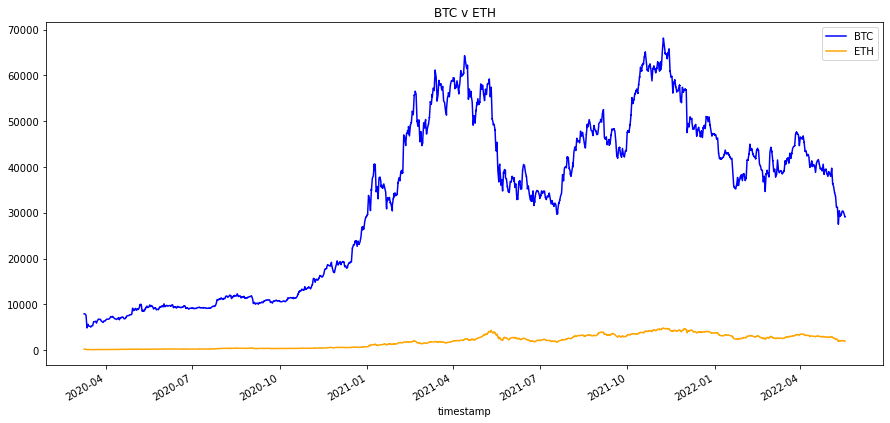

In [33]:
btc_closing.plot(legend=True, figsize=(15, 7), title="BTC v ETH", color="blue", label="BTC")
eth_closing.plot(legend=True, figsize=(15, 7), color="orange", label="ETH")

<AxesSubplot:title={'center':'AVAX v AAVE v SOL'}, xlabel='timestamp'>

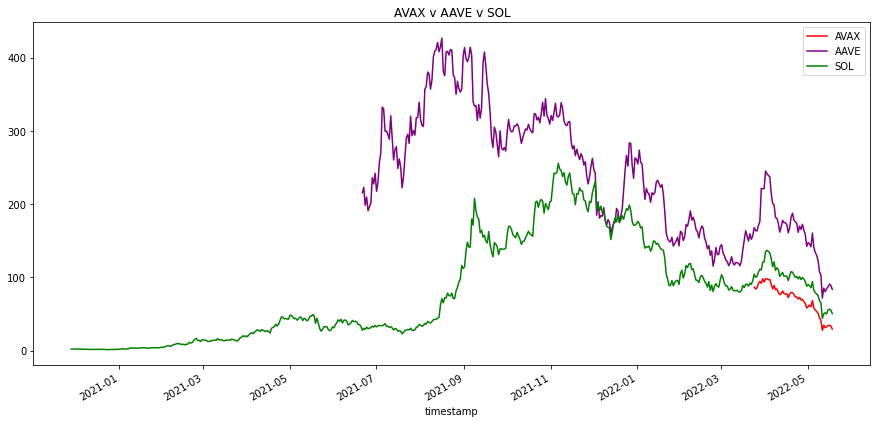

In [34]:
avax_closing.plot(legend=True, figsize=(15, 7), title="AVAX v AAVE v SOL", color="red", label="AVAX")
aave_closing.plot(legend=True, figsize=(15, 7), color="purple", label="AAVE")
sol_closing.plot(legend=True, figsize=(15, 7), color="green", label="SOL")

In [7]:
price_func('BTC')

BTC is currently $30189.24 / 24 hour volume is currently $33731551853.83 / 24 hour change is currently 3.97% / Market cap is currently 574933935355.12 / The last time this data was updated - 05/19/2022 11:14 PM 


In [8]:
price_func('ETH')

ETH is currently $2011.06 / 24 hour volume is currently $19077030140.65 / 24 hour change is currently 2.86% / Market cap is currently 243027304573.71 / The last time this data was updated - 05/19/2022 11:13 PM 


In [9]:
price_func('BNB')

BNB is currently $305.45 / 24 hour volume is currently $1664259882.54 / 24 hour change is currently 4.20% / Market cap is currently 49872759446.03 / The last time this data was updated - 05/19/2022 11:13 PM 


In [10]:
price_func('AVAX')

AVAX is currently $29.68 / 24 hour volume is currently $837147750.83 / 24 hour change is currently -3.25% / Market cap is currently 7986055904.94 / The last time this data was updated - 05/19/2022 11:13 PM 


In [11]:
price_func('SOL')

SOL is currently $51.40 / 24 hour volume is currently $1952972102.60 / 24 hour change is currently 0.69% / Market cap is currently 17432540044.43 / The last time this data was updated - 05/19/2022 11:13 PM 


In [12]:
price_func('XRP')

XRP is currently $0.42 / 24 hour volume is currently $1571654561.59 / 24 hour change is currently 1.04% / Market cap is currently 20177760287.80 / The last time this data was updated - 05/19/2022 11:14 PM 
